In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mnist.csv')

In [3]:
df.head(5)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

In [4]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [5]:
df.shape

(42000, 785)

In [6]:
X.shape

(42000, 784)

In [7]:
y.shape

(42000,)

In [8]:
y = y.reshape((42000,1))

In [9]:
y.shape

(42000, 1)

In [11]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [12]:
X_train.shape

(33600, 784)

In [13]:
X_test.shape

(8400, 784)

In [14]:
y_train.shape

(33600, 1)

In [15]:
y_test.shape

(8400, 1)

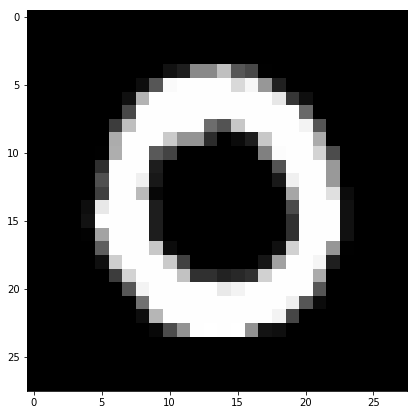

[0]


In [16]:
plt.figure(figsize=(7,7))
index = 1

grid_data = pd.DataFrame(X).iloc[index].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(y[index])

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

C:\Users\Vishal Vikram Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [21]:
pd.DataFrame({'Actual': list(y_test),'Predicted': list(y_pred)})

Actual  Predicted
0       [3]          3
1       [6]          6
2       [9]          9
3       [5]          5
4       [6]          6
5       [5]          4
6       [6]          6
7       [0]          0
8       [0]          0
9       [1]          1
10      [7]          7
11      [1]          1
12      [5]          5
13      [7]          7
14      [8]          8
15      [1]          1
16      [1]          1
17      [5]          5
18      [9]          9
19      [6]          6
20      [9]          9
21      [2]          2
22      [2]          2
23      [8]          8
24      [4]          4
25      [6]          6
26      [2]          2
27      [5]          5
28      [4]          4
29      [4]          4
...     ...        ...
8370    [8]          8
8371    [6]          6
8372    [4]          4
8373    [3]          3
8374    [5]          5
8375    [0]          0
8376    [9]          9
8377    [4]          4
8378    [0]          0
8379    [5]          5
8380    [4]          4
8381    [7]          7
8382    [4]          4
8383    [2]          2
8384    [6]          6
8385    [4]          4
8386    [4]          4
8387    [1]          1
8388    [0]          0
8389    [7]          7
8390    [3]          3
8391    [9]          9
8392    [9]          9
8393    [6]          6
8394    [6]          6
8395    [9]          9
8396    [2]          2
8397    [2]          2
8398    [7]          7
8399    [2]          2

[8400 rows x 2 columns]

In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [23]:
cm

array([[791,   0,   2,   2,   0,   4,  13,   0,   0,   1],
       [  0, 951,   5,   0,   0,   0,   3,   1,   1,   0],
       [ 15,   8, 800,  11,   5,   0,   6,   7,   5,   3],
       [  1,   2,   7, 806,   1,  11,   1,  16,  12,   6],
       [  1,   8,   9,   0, 769,   4,   2,   6,   1,  27],
       [  5,   4,   1,  27,   1, 697,   9,   1,   6,   5],
       [  5,   1,   3,   0,   1,   7, 824,   0,   0,   0],
       [  1,  11,   9,   1,  11,   0,   0, 839,   0,  27],
       [  5,   9,   2,  16,   8,  41,   6,   5, 668,   8],
       [  6,   1,   3,   4,  20,   2,   0,  34,   2, 740]], dtype=int64)

In [24]:
classifier.score(X_test,y_test)

0.93869047619047619

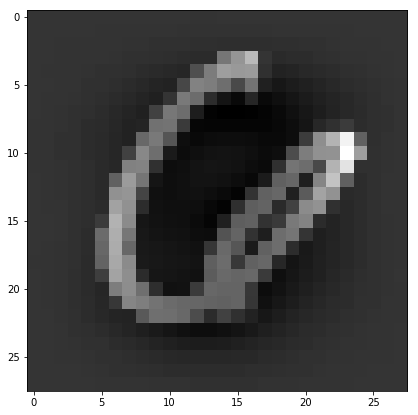

6


In [25]:
plt.figure(figsize=(7,7))
index = 8371

grid_data = pd.DataFrame(X_test).iloc[index].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(y_pred[index]) 